# Jack Managan Final Project: Is There a Good Way To Track Defensive Players of the Year in The NBA

The NBA is Premier stage for Professional Baksetball and to recognize the aptitude of the players, the league regularly gives out awards at the end of the season for individual achievment. Most of these will sound farmiliar including The MVP(most valuable player), Rookie of the year, Most improved player, sixth man of the year, and most interestingly defensive player of the year. Its no secret the leauge has been trying to promote offense to increase viewership and as a result they tend to promote players with an offense focused game. For this reason there is a relative consesus when it comes to awarding MVPs, 6MOTY, and ROTY with them normally going to offensive stars who arent a liabillity on defense. Historically, the Defensive Player of the Year has been hard to predict with much controversy. Especial when taking into account how much the game has changed over the last decade with the renissance of the 3 point shot.

In this analysis I will attempt to find stats that most effectivley corespond to the defensive player of the year

I will be using a dataset of generic box scores for each player for each season they've played along with another dataset from fivethirtyeight with more advanced stats to see if one some stats stand above the rest. these data sets collectively span from the 1990-1991 season to the 2016-2017 season 




## Data collection + parsing

In [254]:
#import necassary libraries for future use
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import numpy as np
from matplotlib import pyplot as plt
import warnings

#set configurations for graphs and data frames
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (24, 16.5)
pd.set_option('display.max_columns', None)

player_by_season_df = pd.read_csv('Seasons_Stats.csv')
historic_raptor_df = pd.read_csv('historical_RAPTOR_by_player.csv')

player_by_season_df = player_by_season_df.drop('Unnamed: 0', axis=1)



display(player_by_season_df)
display(historic_raptor_df)



,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3.0,10.9,15.5,NaN,3.4,2.2,5.6,0.157,NaN,-0.2,2.3,2.1,1.8,253.0,443.0,0.571,0.0,1.0,0.000,253.0,442.0,0.572,0.571,133.0,196.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,12.2,0.7,3.3,10.2,16.5,NaN,0.5,0.6,1.0,0.094,NaN,-3.2,0.8,-2.5,-0.1,78.0,158.0,0.494,0.0,1.0,0.000,78.0,157.0,0.497,0.494,22.0,39.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,NaN,-0.1,0.1,0.0,-0.005,NaN,-7.8,0.4,-7.3,-0.1,10.0,31.0,0.323,0.0,0.0,NaN,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,NaN,-0.3,0.8,0.5,0.030,NaN,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19154,Ivica Zubac,zubaciv01,2018,871,410,-2.903709,2.688832,-0.214877,0.531968,0.531968,0.000000,-2.616331,0.752875,-1.863456,0.311576
19155,Ivica Zubac,zubaciv01,2019,2345,1079,-2.362444,1.813768,-0.548676,1.217134,1.114995,0.102138,-2.810283,1.157824,-1.652459,0.077074
19156,Ivica Zubac,zubaciv01,2020,3447,1646,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164
19157,Ivica Zubac,zubaciv01,2021,3908,1910,-0.909039,2.525735,1.616696,4.261327,3.704630,0.556697,-0.874338,2.280011,1.405673,-0.117623


These will be the two main data sets we will be working with starting with a players seasons stats on top and fivethirtyeight's advanced player stats on the bottom

In [255]:
#scraping a list of DPOYs form basketball-refernce.com
    
url = 'https://www.basketball-reference.com/awards/dpoy.html'

output = str(BeautifulSoup(urlopen(url), 'html.parser').findAll('table', id='dpoy_NBA')[0])
dpoyframe = pd.read_html(output)[0]


In [256]:
#making the year correspond with the season for our scraped DPOY list 
for index, row in player_by_season_df.iterrows():
    
    if isinstance(row['Player'], str) == False:
        continue 
        
    temp = int(row['Year'])
    season = str(temp-1) + "-" + str(int(row['Year']))[2:4]
    player_by_season_df.loc[index, 'Year'] = season


player_by_season_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1949-50,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1949-50,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1949-50,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1949-50,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1949-50,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2016-17,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3.0,10.9,15.5,NaN,3.4,2.2,5.6,0.157,NaN,-0.2,2.3,2.1,1.8,253.0,443.0,0.571,0.0,1.0,0.000,253.0,442.0,0.572,0.571,133.0,196.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2016-17,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,12.2,0.7,3.3,10.2,16.5,NaN,0.5,0.6,1.0,0.094,NaN,-3.2,0.8,-2.5,-0.1,78.0,158.0,0.494,0.0,1.0,0.000,78.0,157.0,0.497,0.494,22.0,39.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2016-17,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,NaN,-0.1,0.1,0.0,-0.005,NaN,-7.8,0.4,-7.3,-0.1,10.0,31.0,0.323,0.0,0.0,NaN,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2016-17,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,NaN,-0.3,0.8,0.5,0.030,NaN,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [257]:
#optimzing year for the raptor dataset
for index, row in historic_raptor_df.iterrows():  
        
    temp = int(row['season'])
    season = str(temp-1) + "-" + str(int(row['season']))[2:4]
    
    historic_raptor_df.loc[index, 'season'] = season


historic_raptor_df

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1990-91,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1991-92,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1992-93,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1993-94,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1994-95,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19154,Ivica Zubac,zubaciv01,2017-18,871,410,-2.903709,2.688832,-0.214877,0.531968,0.531968,0.000000,-2.616331,0.752875,-1.863456,0.311576
19155,Ivica Zubac,zubaciv01,2018-19,2345,1079,-2.362444,1.813768,-0.548676,1.217134,1.114995,0.102138,-2.810283,1.157824,-1.652459,0.077074
19156,Ivica Zubac,zubaciv01,2019-20,3447,1646,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164
19157,Ivica Zubac,zubaciv01,2020-21,3908,1910,-0.909039,2.525735,1.616696,4.261327,3.704630,0.556697,-0.874338,2.280011,1.405673,-0.117623


In [258]:
#standardizing column names for Scraped data for ease of use in the future
def standardize(frame):
    fixed = {   
                    'Season': frame['Unnamed: 0_level_0']['Season'], 
                    'Player': frame['Unnamed: 2_level_0']['Player'],
                    'Age': frame['Unnamed: 4_level_0']['Age'],
                    'Team': frame['Unnamed: 5_level_0']['Tm'],
                    'Games Played': frame['Unnamed: 6_level_0']['G'],
                    'MPG': frame['Per Game']['MP'],
                    'PPG': frame['Per Game']['PTS'],
                    'RPG': frame['Per Game']['TRB'],
                    'APG': frame['Per Game']['AST'],
                    'SPG': frame['Per Game']['STL'],
                    'BPG': frame['Per Game']['BLK'],
                    'FG%': frame['Shooting']['FG%'],
                    '3P%': frame['Shooting']['3P%'],
                    'FT%': frame['Shooting']['FT%'],
                    'WS': frame['Advanced']['WS'],
                    'WS/48': frame['Advanced']['WS']}
    
    ret = pd.DataFrame(data=fixed)
    
    
    return ret

dpoyframe = standardize(dpoyframe)


display(dpoyframe) 

,Season,Player,Age,Team,Games Played,MPG,PPG,RPG,APG,SPG,BPG,FG%,3P%,FT%,WS,WS/48
0,2021-22,Marcus Smart,27,BOS,71,32.3,12.1,3.8,5.9,1.7,0.3,0.418,0.331,0.793,5.6,5.6
1,2020-21,Rudy Gobert,28,UTA,71,30.8,14.3,13.5,1.3,0.6,2.7,0.675,0.000,0.623,11.3,11.3
2,2019-20,Giannis Antetokounmpo,25,MIL,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,11.1
3,2018-19,Rudy Gobert,26,UTA,81,31.8,15.9,12.9,2.0,0.8,2.3,0.669,NaN,0.636,14.4,14.4
4,2017-18,Rudy Gobert,25,UTA,56,32.4,13.5,10.7,1.4,0.8,2.3,0.622,NaN,0.682,8.1,8.1
5,2016-17,Draymond Green,26,GSW,76,32.5,10.2,7.9,7.0,2.0,1.4,0.418,0.308,0.709,8.2,8.2
6,2015-16,Kawhi Leonard,24,SAS,72,33.1,21.2,6.8,2.6,1.8,1.0,0.506,0.443,0.874,13.7,13.7
7,2014-15,Kawhi Leonard,23,SAS,64,31.8,16.5,7.2,2.5,2.3,0.8,0.479,0.349,0.802,8.6,8.6
8,2013-14,Joakim Noah,28,CHI,80,35.3,12.6,11.3,5.4,1.2,1.5,0.475,0.000,0.737,11.2,11.2
9,2012-13,Marc Gasol,28,MEM,80,35.0,14.1,7.8,4.0,1.0,1.7,0.494,0.071,0.848,11.5,11.5


## Data Managment

Now that we have useable data lets look into some preliminary graphs to illustrate the trouble with Defensive stats. Starting with Joakim Noah's dominant 2013-14 season we can see that he is a outlier in these two metrics Defensive Box Plus Minus(points allowed while on the floor vs off the floor in 100 posessions) and Deffinsive Win Shares (effective points denied while on the floor per 100 possesions). 

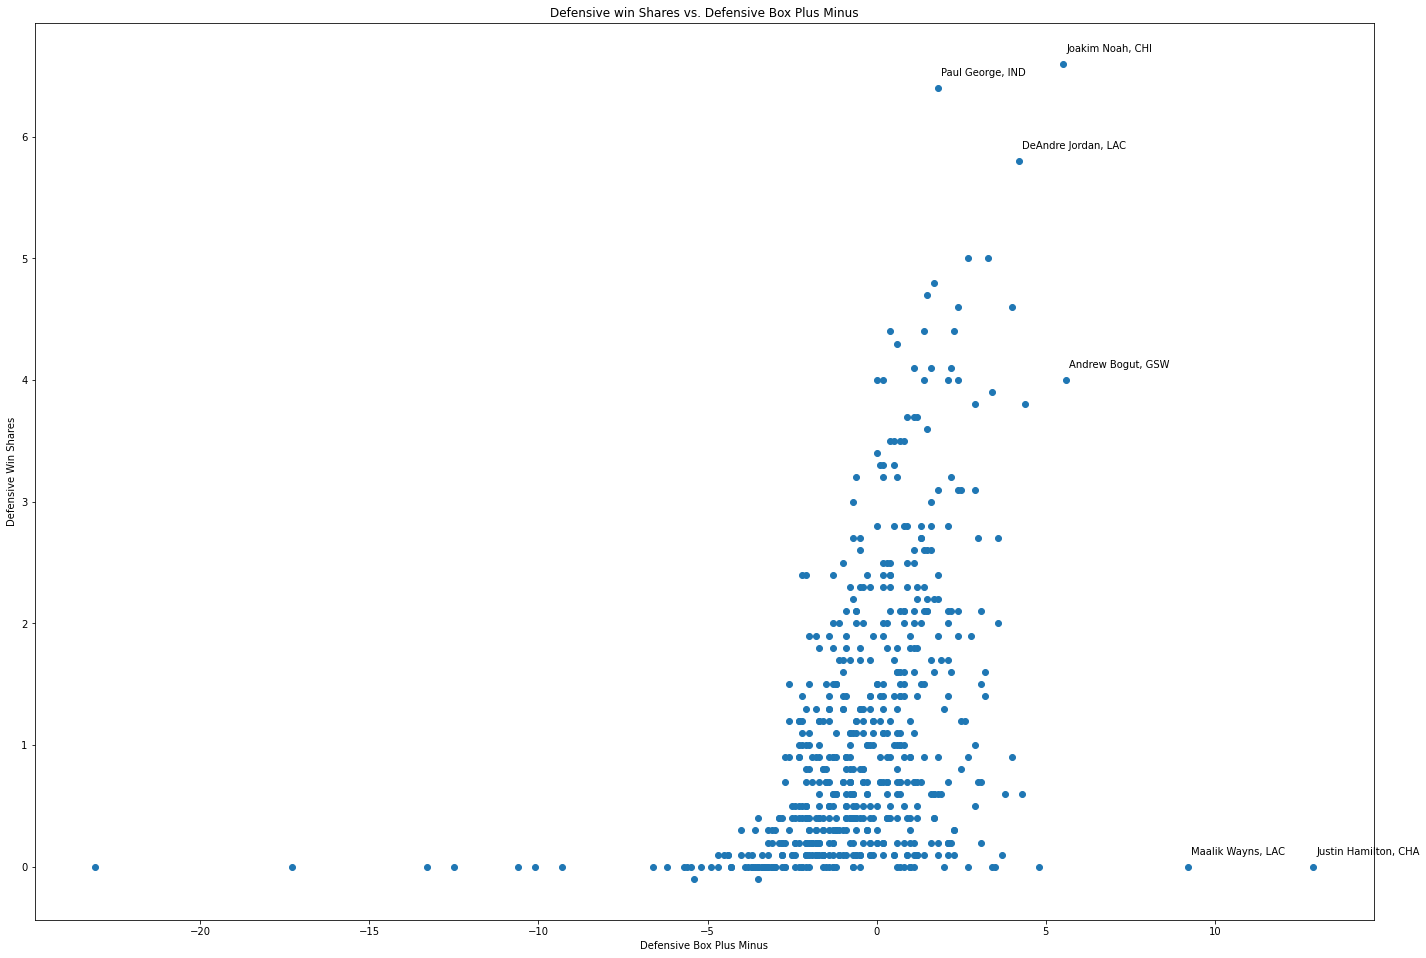

In [259]:
defense = player_by_season_df[player_by_season_df['Year'] == '2013-14']
plt.scatter(defense['DBPM'], defense['DWS'])

for index, row in defense.iterrows():
    if (row['DWS'] >= 5 and row['DBPM'] >= 5) or (row['DWS'] >= 5.5) or (row['DBPM'] >= 5):
        plt.text((row['DBPM'])+0.1, row['DWS'] + 0.1, row['Player'] + ", " + row['Tm'])
        
        
plt.ylabel('Defensive Win Shares')
plt.xlabel('Defensive Box Plus Minus')
plt.title('Defensive win Shares vs. Defensive Box Plus Minus')
plt.show()

In this graph you can see more standouts like Deandre Jordan, Draymond Green, and Tim duncan. Despite this Kawhi leonard won the Defensive player of the year award in the 2014-15 season. Maybe there are more stats that can help us find defensive winners of the year.

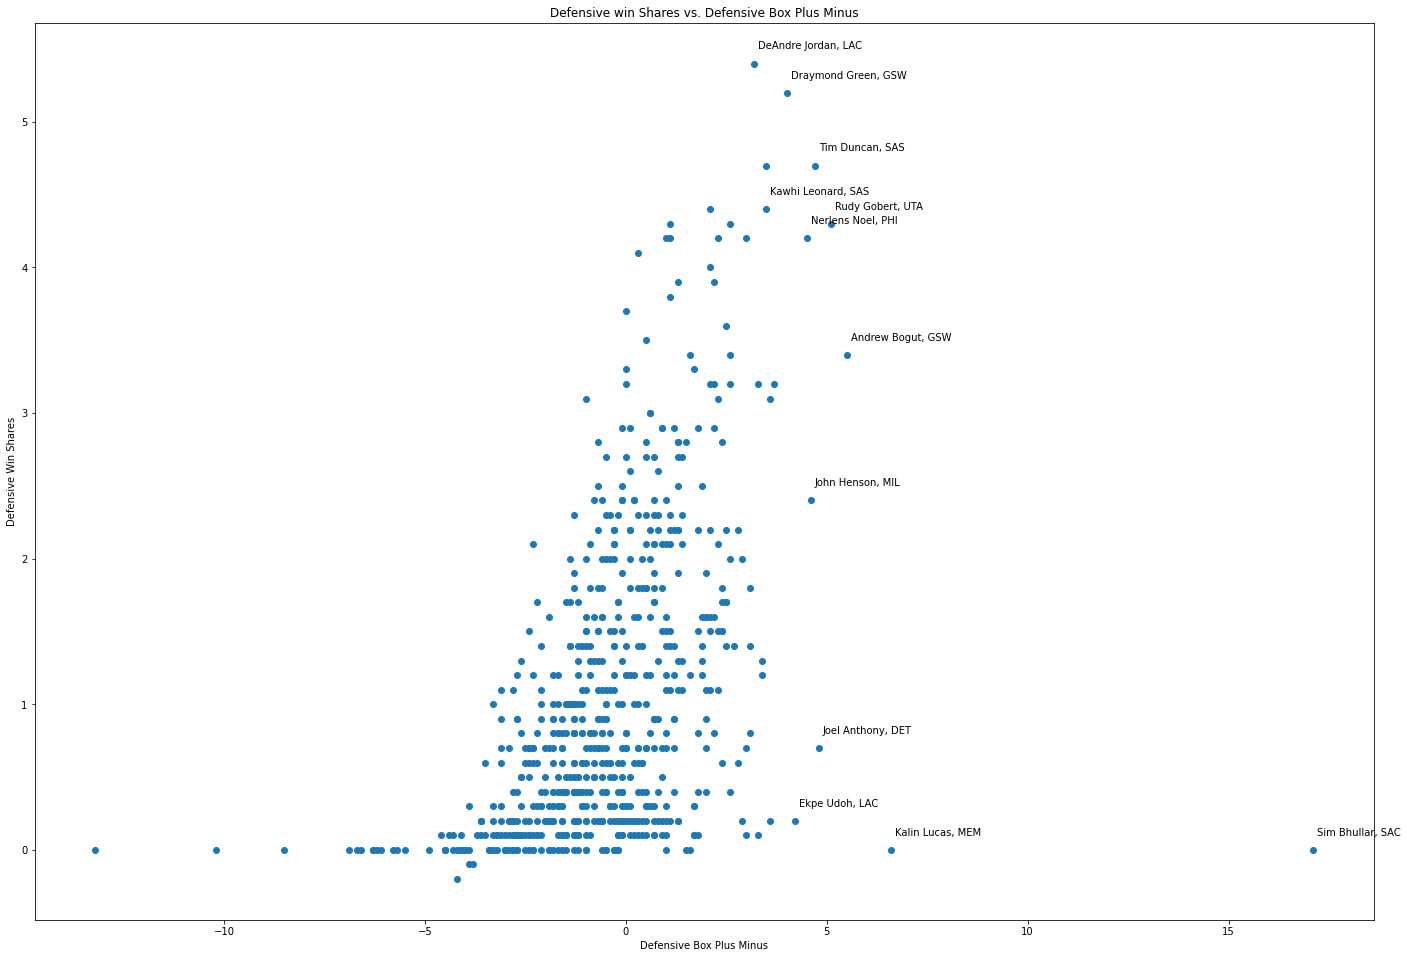

In [260]:
defense = player_by_season_df[player_by_season_df['Year'] == '2014-15']
plt.scatter(defense['DBPM'], defense['DWS'])

for index, row in defense.iterrows():
    if (row['DWS'] >= 5 and row['DBPM'] >= 3) or (row['DWS'] >= 5.5) or (row['DBPM'] >= 4) or (row['Player'] == "Kawhi Leonard"):  
        plt.text((row['DBPM'])+0.1, row['DWS'] + 0.1, row['Player'] + ", " + row['Tm'])
        
        
plt.ylabel('Defensive Win Shares')
plt.xlabel('Defensive Box Plus Minus')
plt.title('Defensive win Shares vs. Defensive Box Plus Minus')
plt.show()

## Data Analysis

In [261]:
#this function compares a given metric for a DPOY comapred to his peers and checks to see if he is in the top x
#players for a given metric 
def compare(metric, x):
    matches = 0
    for index, row in dpoyframe.iterrows():
        
         #account for tracked years in both data sets
        if index >= 5:
            
            temp = player_by_season_df[player_by_season_df['Year'] == row['Season']]  
            
            top = (temp[metric].nlargest(x).index)
               
            for player_dex in top:
                    
                    if temp.loc[player_dex,'Player'] == dpoyframe.loc[index, 'Player']:
                        
                        matches += 1
            
    
                
    return (str(matches) + " DPOYs are in the top "+ str(x) +" in this category out of "+ str(len(dpoyframe)) +" DPOYs")


In [262]:
#this function preforms the same as above but for the raptor data set 
def raptor_compare(metric, x):
    matches = 0
    for index, row in dpoyframe.iterrows():
        
        #account for tracked years in both data sets
        if index >= 1 and index <= 31:
            
            temp = historic_raptor_df[historic_raptor_df['season'] == row['Season']]
            
            top = (temp[metric].nlargest(x).index)
               
            for player_dex in top:
                    
                    if temp.loc[player_dex,'player_name'] == dpoyframe.loc[index, 'Player']:
                        
                        matches += 1
    #the raptor data set only goes back to the 1990-91 season but can account for stats of players up to 2020-21 season
    return (str(matches) + " DPOYs are in the top "+ str(x) +" in this category out of 30 DPOYs")

Using this information lets see how many DPOYs rank in the top 10 of each given stat

In [263]:
compare('DWS', 10)

'18 DPOYs are in the top 10 in this category out of 40 DPOYs'

In [264]:
compare('DBPM',10)

'14 DPOYs are in the top 10 in this category out of 40 DPOYs'

In [265]:
compare('VORP',10)

'13 DPOYs are in the top 10 in this category out of 40 DPOYs'

In [266]:
compare('DRB',10)

'11 DPOYs are in the top 10 in this category out of 40 DPOYs'

In [267]:
compare('STL',10)

'4 DPOYs are in the top 10 in this category out of 40 DPOYs'

In [268]:
compare('BLK',10)

'11 DPOYs are in the top 10 in this category out of 40 DPOYs'

None of these stats seem to be a good measure of who would win the DPOY considering they are only in the top 10 and our highest percentage stat is at 45%. Lets look into some Stats that Fivethirtyeight has created call Raptor and predator. These advanced metrics use ratings in on ball shot percentage form various points of the floor along with possesions gained all over 100 possesions compared to a replacment.

In [269]:
raptor_compare('raptor_defense',10)

'18 DPOYs are in the top 10 in this category out of 30 DPOYs'

In [270]:
raptor_compare('predator_defense', 10)

'20 DPOYs are in the top 10 in this category out of 30 DPOYs'

These metrics are much more accurate as you can see and 66% of DPOY have their Definsive Raptor score with in the top 10 of other players. Lets graph some of these stats so we can see how the DPOYS rank angainst each other. 

In [271]:

#takes in a stat for a given year and returns the max stat for that year and 
def grapher(stat, year):
    dpoy = dpoyframe[dpoyframe['Season'] == year]['Player'].max()
    
    season = player_by_season_df[player_by_season_df['Year'] == year]
    
    meanstat = np.mean(season[stat])
    stdstat = np.std(season[stat])
    
    
    standardized = [(i - meanstat)/stdstat for i in season[stat]]
    dpoy_stat = season.loc[season['Player'] == dpoy]
    
    return ((dpoy_stat[stat]-meanstat)/stdstat).max()

In [272]:
def raptor_grapher(stat, year):
    dpoy = dpoyframe[dpoyframe['Season'] == year]['Player'].max()
    
    season = historic_raptor_df[historic_raptor_df['season'] == year]
    
    meanstat = np.mean(season[stat])
    stdstat = np.std(season[stat])
    
    
    standardized = [(i - meanstat)/stdstat for i in season[stat]]
    dpoy_stat = season.loc[season['player_name'] == dpoy]
    
    return ((dpoy_stat[stat]-meanstat)/stdstat).max()

In [273]:
basic_stats = ['DWS', 'DBPM']
adv_stats = ['raptor_defense', 'predator_defense']
dpoys = {}
for index, row in dpoyframe.iterrows():
    if index >= 5:
        tmp = []
        for s in basic_stats:
            tmp.append(grapher(s, row['Season']))
        for s in adv_stats:
            tmp.append(raptor_grapher(s, row['Season']))
        dpoys[row['Season'] + " " + row['Player']] = tmp

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

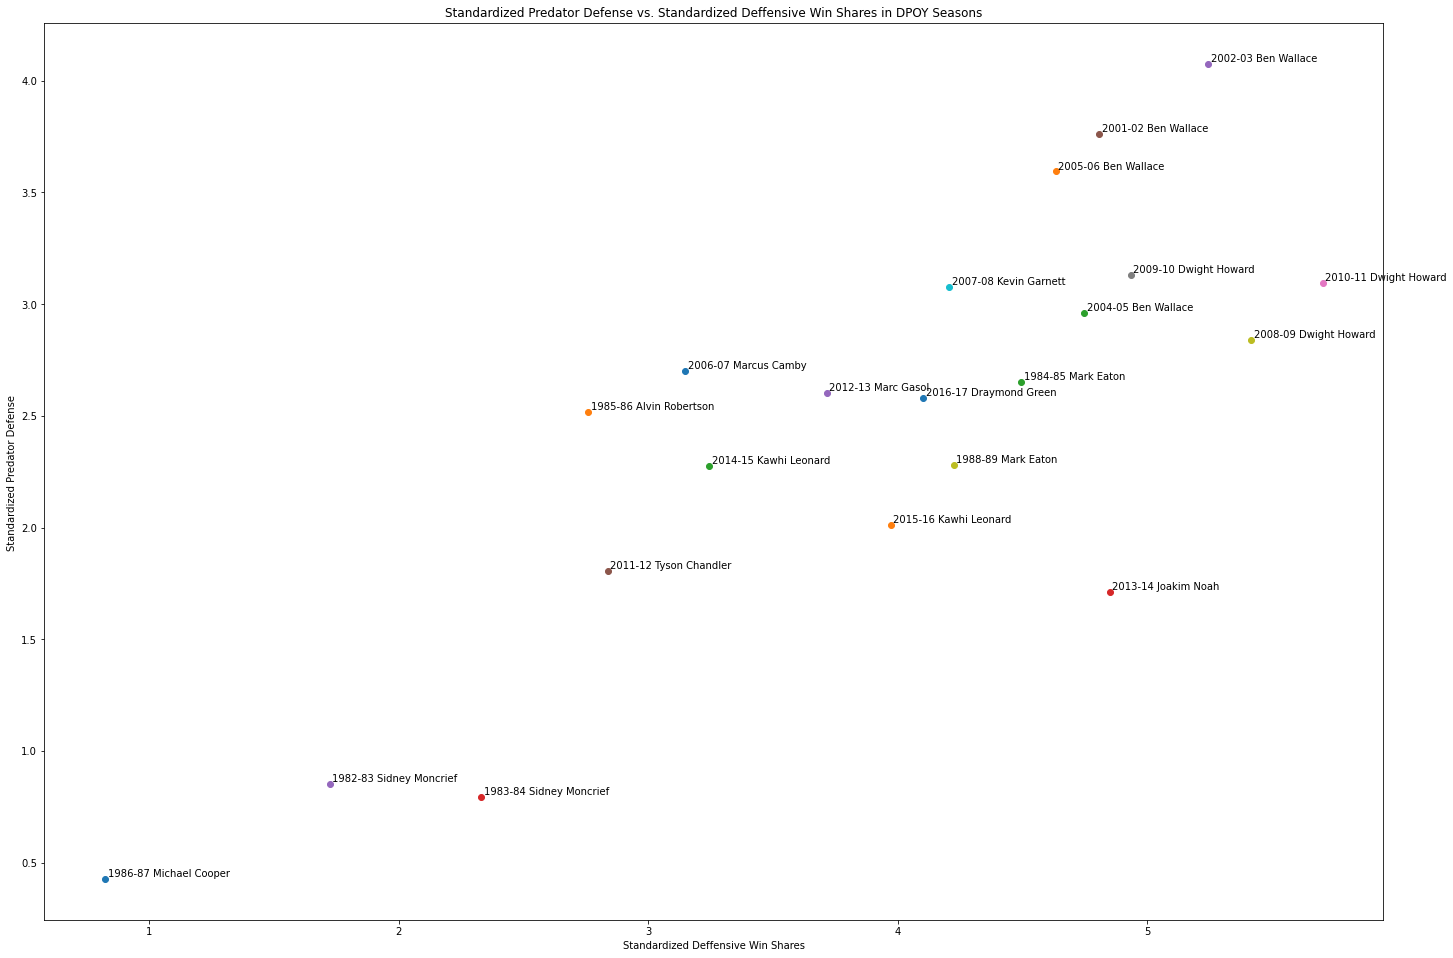

In [274]:
DWS = []
DBPM = []
raptor_defense = []
predator_defense = []

ppg = []
vorp = []
per = []
ws = []

for e in dpoys:
    DWS.append(dpoys[e][0])
    DBPM.append(dpoys[e][1])
    raptor_defense.append(dpoys[e][2])
    predator_defense.append(dpoys[e][3])
    plt.scatter(dpoys[e][0], dpoys[e][3])
    plt.text(dpoys[e][0]+0.01, dpoys[e][3]+0.01, e)

plt.title('Standardized Predator Defense vs. Standardized Deffensive Win Shares in DPOY Seasons')
plt.ylabel('Standardized Predator Defense ')
plt.xlabel('Standardized Deffensive Win Shares')
plt.show()

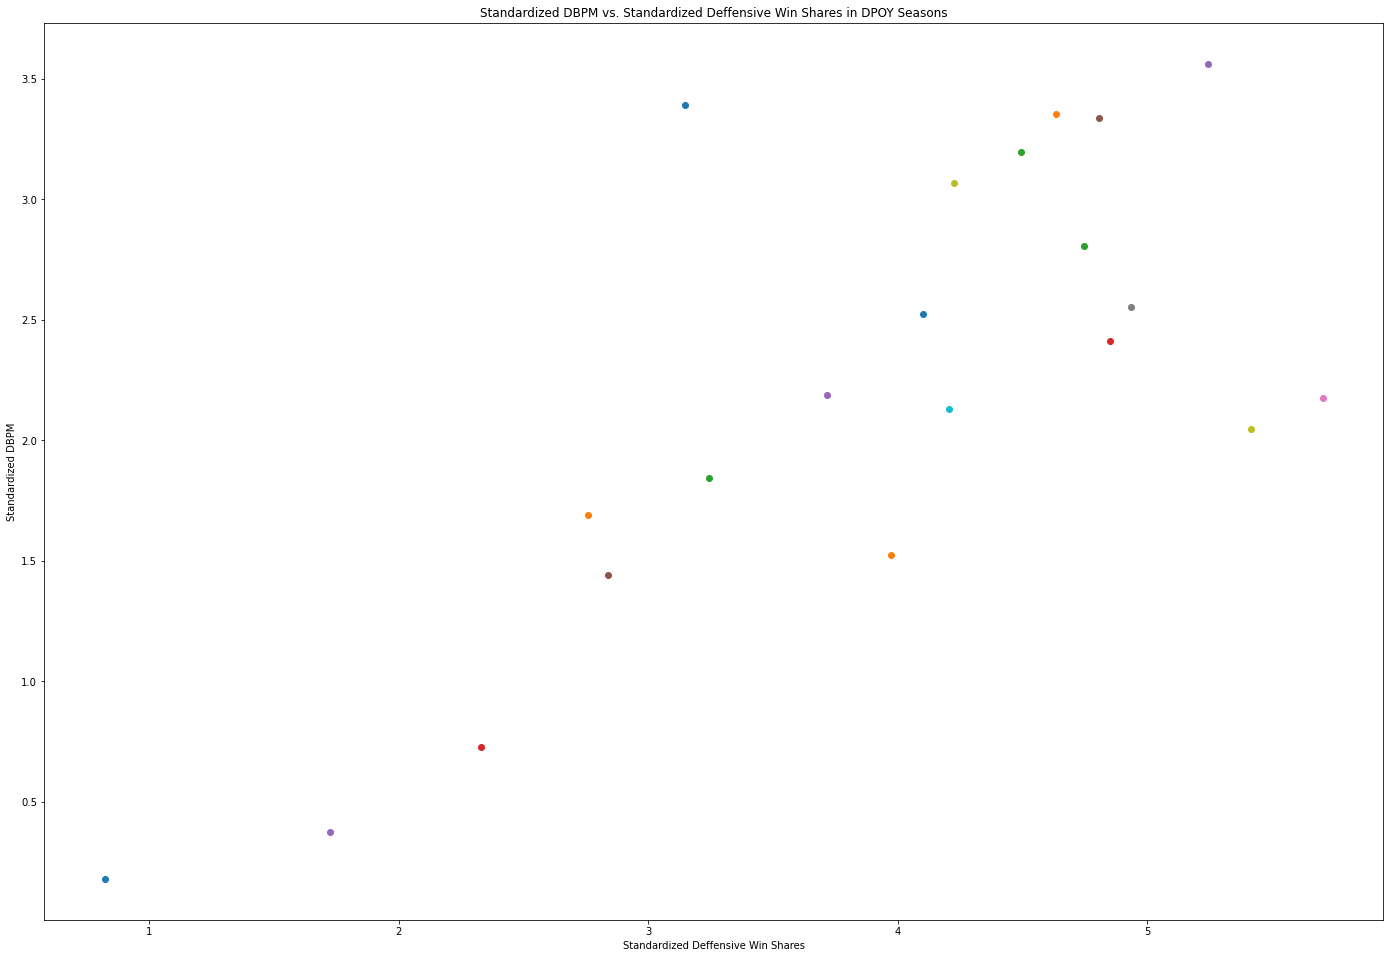

In [275]:
plt.rcParams["figure.figsize"] = (24, 16.5)


for e in dpoys:
    
    plt.scatter(dpoys[e][0], dpoys[e][1])

plt.title('Standardized DBPM vs. Standardized Deffensive Win Shares in DPOY Seasons')
plt.ylabel('Standardized DBPM')
plt.xlabel('Standardized Deffensive Win Shares')
plt.show()


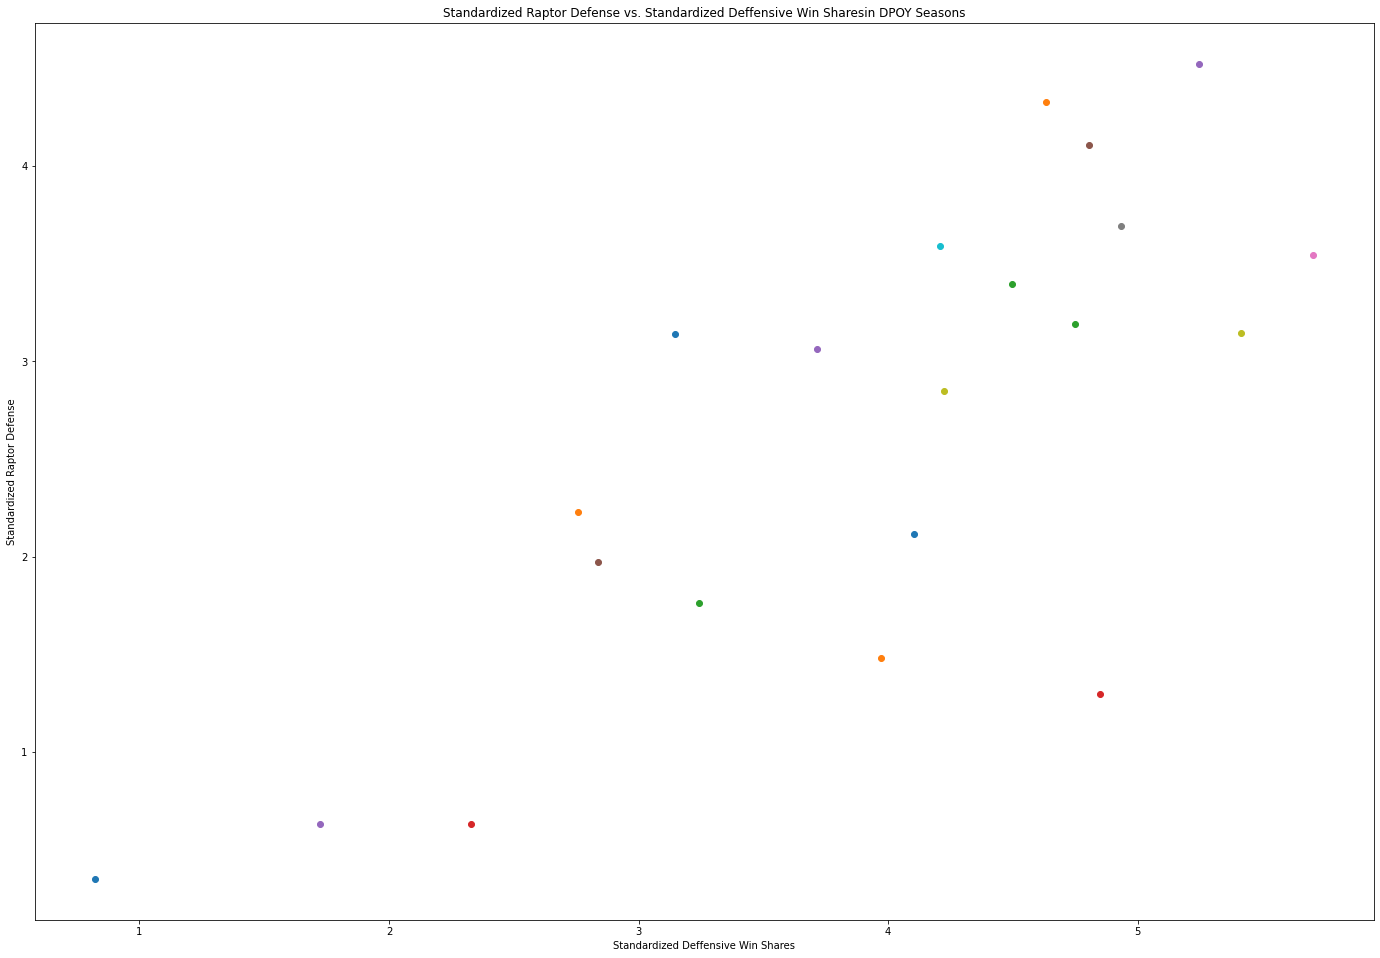

In [276]:

for e in dpoys:
    plt.scatter(dpoys[e][0], dpoys[e][2])

plt.title('Standardized Raptor Defense vs. Standardized Deffensive Win Sharesin DPOY Seasons')
plt.ylabel('Standardized Raptor Defense')
plt.xlabel('Standardized Deffensive Win Shares')
plt.show()


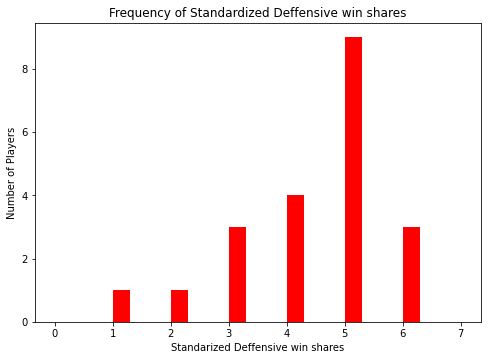

In [277]:
plt.rcParams["figure.figsize"] = (8,5.5)


plt.hist(np.ceil(DWS), bins=np.arange(8), color='red', width=0.3)
plt.title('Frequency of Standardized Deffensive win shares')
plt.ylabel('Number of Players')
plt.xlabel('Standarized Deffensive win shares')
plt.show()

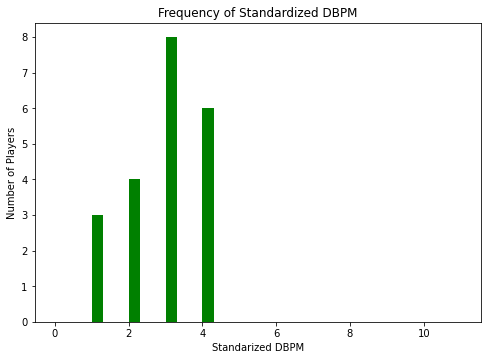

In [278]:
plt.hist(np.ceil(DBPM), bins=np.arange(12), color='green', width=0.3)
plt.title('Frequency of Standardized DBPM')
plt.ylabel('Number of Players')
plt.xlabel('Standarized DBPM')
plt.show()

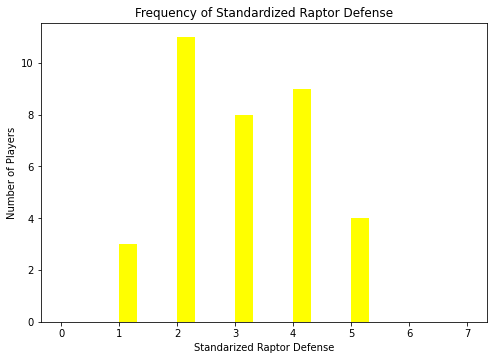

In [279]:
plt.hist(np.ceil(raptor_defense), bins=np.arange(8), color='yellow', width=0.3)
plt.title('Frequency of Standardized Raptor Defense')
plt.ylabel('Number of Players')
plt.xlabel('Standarized Raptor Defense')
plt.show()

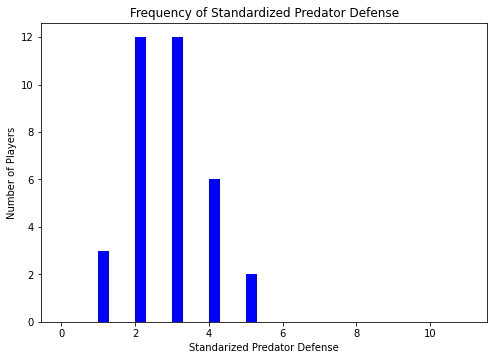

In [280]:
plt.hist(np.ceil(predator_defense), bins=np.arange(12), color='blue', width=0.3)


plt.title('Frequency of Standardized Predator Defense')
plt.ylabel('Number of Players')
plt.xlabel('Standarized Predator Defense')
plt.show()

## insights attained 